In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from matplotlib import rc

rc('text', usetex=True)

In [9]:
def do_plot(df,first_ind,ylim,ylabel='OD600',figsize=(5,2.2),outname=None):
    plt.figure(figsize=figsize)

    scs = [col for col in df.columns if 'sc' in col]
    kms = [col for col in df.columns if 'km' in col]

    pos = 0
    tick_pos = []
    for g in df.index:
        x = np.array([pos]*5)
        if g == first_ind: label = 'IMX581'
        else: label = None

        plt.bar(pos,np.mean(df.loc[g,scs]),color='#1f77b4',label=label,zorder=0)
        
        plt.scatter(x+np.random.normal(0,0.1,5),df.loc[g,scs],color='k',zorder=1,s=3)

        if g == first_ind: label = r"IMX581 $\mathit{ScERG1}$$::$$\mathit{kmERG1}$"
        else: label = None

        plt.bar(pos+1,np.mean(df.loc[g,kms]),color='#ff7f0e',label=label,zorder=0)
        
        plt.scatter(x+1+np.random.normal(0,0.1,5),df.loc[g,kms],color='k',zorder=1,s=3)

        pval = ttest_ind(df.loc[g,scs],df.loc[g,kms])[1]
        print(pval)
        if pval<0.001: pval='$p$<0.001'
        else: pval = '$p$={0:.3f}'.format(pval)
        #print(pval)
        plt.text(pos+0.5,np.max(df.loc[g,:])+(ylim[1]-ylim[0])/50,pval,ha='center',va='bottom',fontsize=8)
        tick_pos.append(pos+0.5)
        pos += 3
    
    # add trendline
    plt.plot(np.arange(0,3*df.shape[0],3)+0.5,np.mean(df.loc[:,scs],axis=1),'-',color='#1f77b4',zorder=1)
    plt.plot(np.arange(0,3*df.shape[0],3)+0.5,np.mean(df.loc[:,kms],axis=1),'-',color='#ff7f0e',zorder=1)
    
    plt.xticks(tick_pos,df.index)
    plt.ylim(ylim)
    plt.legend(loc='upper right')
    plt.ylabel(ylabel)
    plt.tight_layout()
    if outname is not None: plt.savefig(outname)
    plt.show()

#### 42 C

In [10]:
data = {
    'sc_1': [1.40,0.256],
    'sc_2': [0.98,0.240],
    'sc_3': [1.50,0.201],
    'sc_4': [1.30,0.178],
    'sc_5': [0.96,0.223],
    'km_1': [2.12,0.246],
    'km_2': [1.17,0.238],
    'km_3': [1.01,0.224],
    'km_4': [1.74,0.216],
    'km_5': [1.46,0.231]
}
df_YPD42 = pd.DataFrame(data=data,index=['P{0}'.format(i+1) for i in range(len(data['sc_1']))])
df_YPD42

,sc_1,sc_2,sc_3,sc_4,sc_5,km_1,km_2,km_3,km_4,km_5
P1,1.400,0.98,1.500,1.300,0.960,2.120,1.170,1.010,1.740,1.460
P2,0.256,0.24,0.201,0.178,0.223,0.246,0.238,0.224,0.216,0.231


In [18]:
df_YPD42.to_csv('../data/OD600_different_passages_42C.csv')

0.26599048255452884
0.4630992924615711


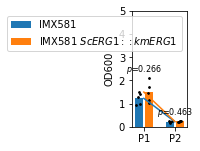

In [11]:
do_plot(df_YPD42,'P1',ylim=(0,5),figsize=(2,2.2),
       outname='../figures/exp_42_generations.pdf')

#### 40 C

In [12]:
data = {
    'sc_1': [3.53,2.17,1.04,1.54,1.53,2.01],
    'sc_2': [3.67,1.87,1.09,1.44,1.44,1.65],
    'sc_3': [3.57,1.56,0.73,0.90,1.10,1.78],
    'sc_4': [3.78,1.80,1.03,1.60,1.46,1.78],
    'sc_5': [3.62,1.43,1.16,1.46,1.76,1.92],
    'km_1': [3.69,1.12,2.05,2.01,2.04,2.15],
    'km_2': [3.35,1.40,1.99,2.11,1.80,2.40],
    'km_3': [3.97,1.57,1.96,2.17,2.25,2.46],
    'km_4': [3.83,1.38,2.20,2.43,1.95,2.00],
    'km_5': [3.81,1.09,2.01,2.44,1.75,2.15]
}
df_YPD = pd.DataFrame(data=data,index=['P{0}'.format(i+1) for i in range(len(data['sc_1']))])
df_YPD

,sc_1,sc_2,sc_3,sc_4,sc_5,km_1,km_2,km_3,km_4,km_5
P1,3.53,3.67,3.57,3.78,3.62,3.69,3.35,3.97,3.83,3.81
P2,2.17,1.87,1.56,1.80,1.43,1.12,1.40,1.57,1.38,1.09
P3,1.04,1.09,0.73,1.03,1.16,2.05,1.99,1.96,2.20,2.01
P4,1.54,1.44,0.90,1.60,1.46,2.01,2.11,2.17,2.43,2.44
P5,1.53,1.44,1.10,1.46,1.76,2.04,1.80,2.25,1.95,1.75
P6,2.01,1.65,1.78,1.78,1.92,2.15,2.40,2.46,2.00,2.15


0.4222966650959096
0.020383922129212376
1.939298016449149e-06
0.000548781890606994
0.006951935362803424
0.005192812014866184


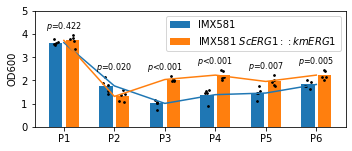

In [13]:
do_plot(df_YPD,'P1',(0,5),
       outname='../figures/exp_40_generations.pdf')

#### 40 °C repeat

In [14]:

data = {
    'sc_1': [0.159*20,2.15,1.01,1.03,0.86,0.62,0.68],
    'sc_2': [0.182*20,2.27,0.96,0.95,0.97,0.98,0.97],
    'sc_3': [0.166*20,1.67,1.78,1.12,0.88,0.92,0.98],
    'sc_4': [0.182*20,2.22,1.02,0.86,0.76,0.55,0.65],
    'sc_5': [0.179*20,2.10,1.01,0.97,0.83,0.70,0.81],
    'km_1': [0.147*20,2.20,1.98,1.36,1.30,1.48,1.43],
    'km_2': [0.155*20,2.29,1.81,1.63,1.20,1.42,1.45],
    'km_3': [0.177*20,1.34,1.54,1.38,1.15,1.43,1.31],
    'km_4': [0.182*20,1.40,1.79,1.34,1.03,1.23,1.37],
    'km_5': [0.163*20,2.21,1.78,1.41,1.23,1.38,1.21],
}
df_YPD_re = pd.DataFrame(data=data,index=['P{0}'.format(i+1) for i in range(len(data['sc_1']))])
df_YPD_re

,sc_1,sc_2,sc_3,sc_4,sc_5,km_1,km_2,km_3,km_4,km_5
P1,3.18,3.64,3.32,3.64,3.58,2.94,3.10,3.54,3.64,3.26
P2,2.15,2.27,1.67,2.22,2.10,2.20,2.29,1.34,1.40,2.21
P3,1.01,0.96,1.78,1.02,1.01,1.98,1.81,1.54,1.79,1.78
P4,1.03,0.95,1.12,0.86,0.97,1.36,1.63,1.38,1.34,1.41
P5,0.86,0.97,0.88,0.76,0.83,1.30,1.20,1.15,1.03,1.23
P6,0.62,0.98,0.92,0.55,0.70,1.48,1.42,1.43,1.23,1.38
P7,0.68,0.97,0.98,0.65,0.81,1.43,1.45,1.31,1.37,1.21


In [19]:
df_YPD_re.to_csv('../data/OD600_different_passages_40C.csv')

0.3071766486653719
0.43806217285854876
0.006582026069128921
0.00020434428373136535
0.0004603664241351136
0.00014779781030237565
0.0001815580117326102


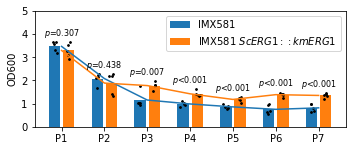

In [16]:
do_plot(df_YPD_re,'P1',(0,5),
       outname='../figures/exp_40_re_generations.pdf')